In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def clean_df(df):
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
    df['active_user'] = df['last_trip_date'].apply(lambda x: 1 if x.month >= 6 else 0)
def clean(df):
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
    df['active_user'] = df['last_trip_date'].apply(lambda x: 1 if x.month >= 6 else 0)
    start = np.array([x.month for x in df['signup_date']])
    end = np.array([x.month for x in df['last_trip_date']])
    for i in ['avg_rating_by_driver', 'avg_rating_of_driver']:
        means = df[i].mean()
        df[i] = df[i].fillna(means)
    
    return df

In [56]:
data = clean(pd.read_csv('../data/churn_train.csv')).copy()

In [335]:
city_churn = data.groupby(["city"]).agg({"active_user" : "sum", "surge_pct": "count"}).reset_index()

In [342]:
city_churn['Percent_Churned'] = city_churn['active_user']/city_churn['surge_pct']

In [343]:
city_churn

,city,active_user,surge_pct,Percent_Churned
0,Astapor,3373,13236,0.254835
1,King's Landing,5113,8144,0.627824
2,Winterfell,6546,18620,0.351557


In [58]:
surge_grouped_phone = data.groupby(["active_user", "phone"]).agg({"surge_pct" : "mean"}).reset_index()

In [59]:
avg_dist_grouped_phone = data.groupby(["active_user", "phone"]).agg({"avg_dist" : "mean"}).reset_index()

In [89]:
churned_phone_luxury = data.groupby(["active_user", "luxury_car_user"]).agg({"city": "count"})

In [109]:
avg_dist_churn = data.groupby(["active_user"]).agg({"avg_dist": "mean"}).reset_index()

In [167]:
ratings = data.groupby(["active_user"]).agg({"avg_rating_of_driver" :"mean"})

In [313]:
phone = data.groupby(['phone']).agg({"active_user" : "sum", "surge_pct": "count"}).reset_index()



In [314]:


phone['Percent_Active'] = phone.active_user/ phone.surge_pct

In [259]:
phone2 = data.groupby(['phone', 'active_user']).agg({"surge_pct": "count"}).reset_index()




In [300]:
avg_dist_churn = data.groupby(["active_user"]).agg({"avg_dist": "mean"}).reset_index()
avg_dist_churn

0    0
1    1
Name: active_user, dtype: int64

In [347]:
key = avg_dist_churn.active_user
value = avg_dist_churn.avg_dist
key2 = phone.phone
value2 = phone.Percent_Active
key3 = city_churn.city
value3 = city_churn.Percent_Churned

In [344]:
x1labels = ['Active User', 'Churned Out']
x1 = np.arange(len(x1labels))
x2labels = ['Android', 'iPhone']
x2 = np.arange(len(x2labels))
x3labels = ['Astapor', "King's Landing", 'Winterfell']
x3 = np.arange(len(x3labels))

In [348]:
city_churn

,city,active_user,surge_pct,Percent_Churned
0,Astapor,3373,13236,0.254835
1,King's Landing,5113,8144,0.627824
2,Winterfell,6546,18620,0.351557


Text(0.5, 1.0, 'Percent of Users Churned by City')

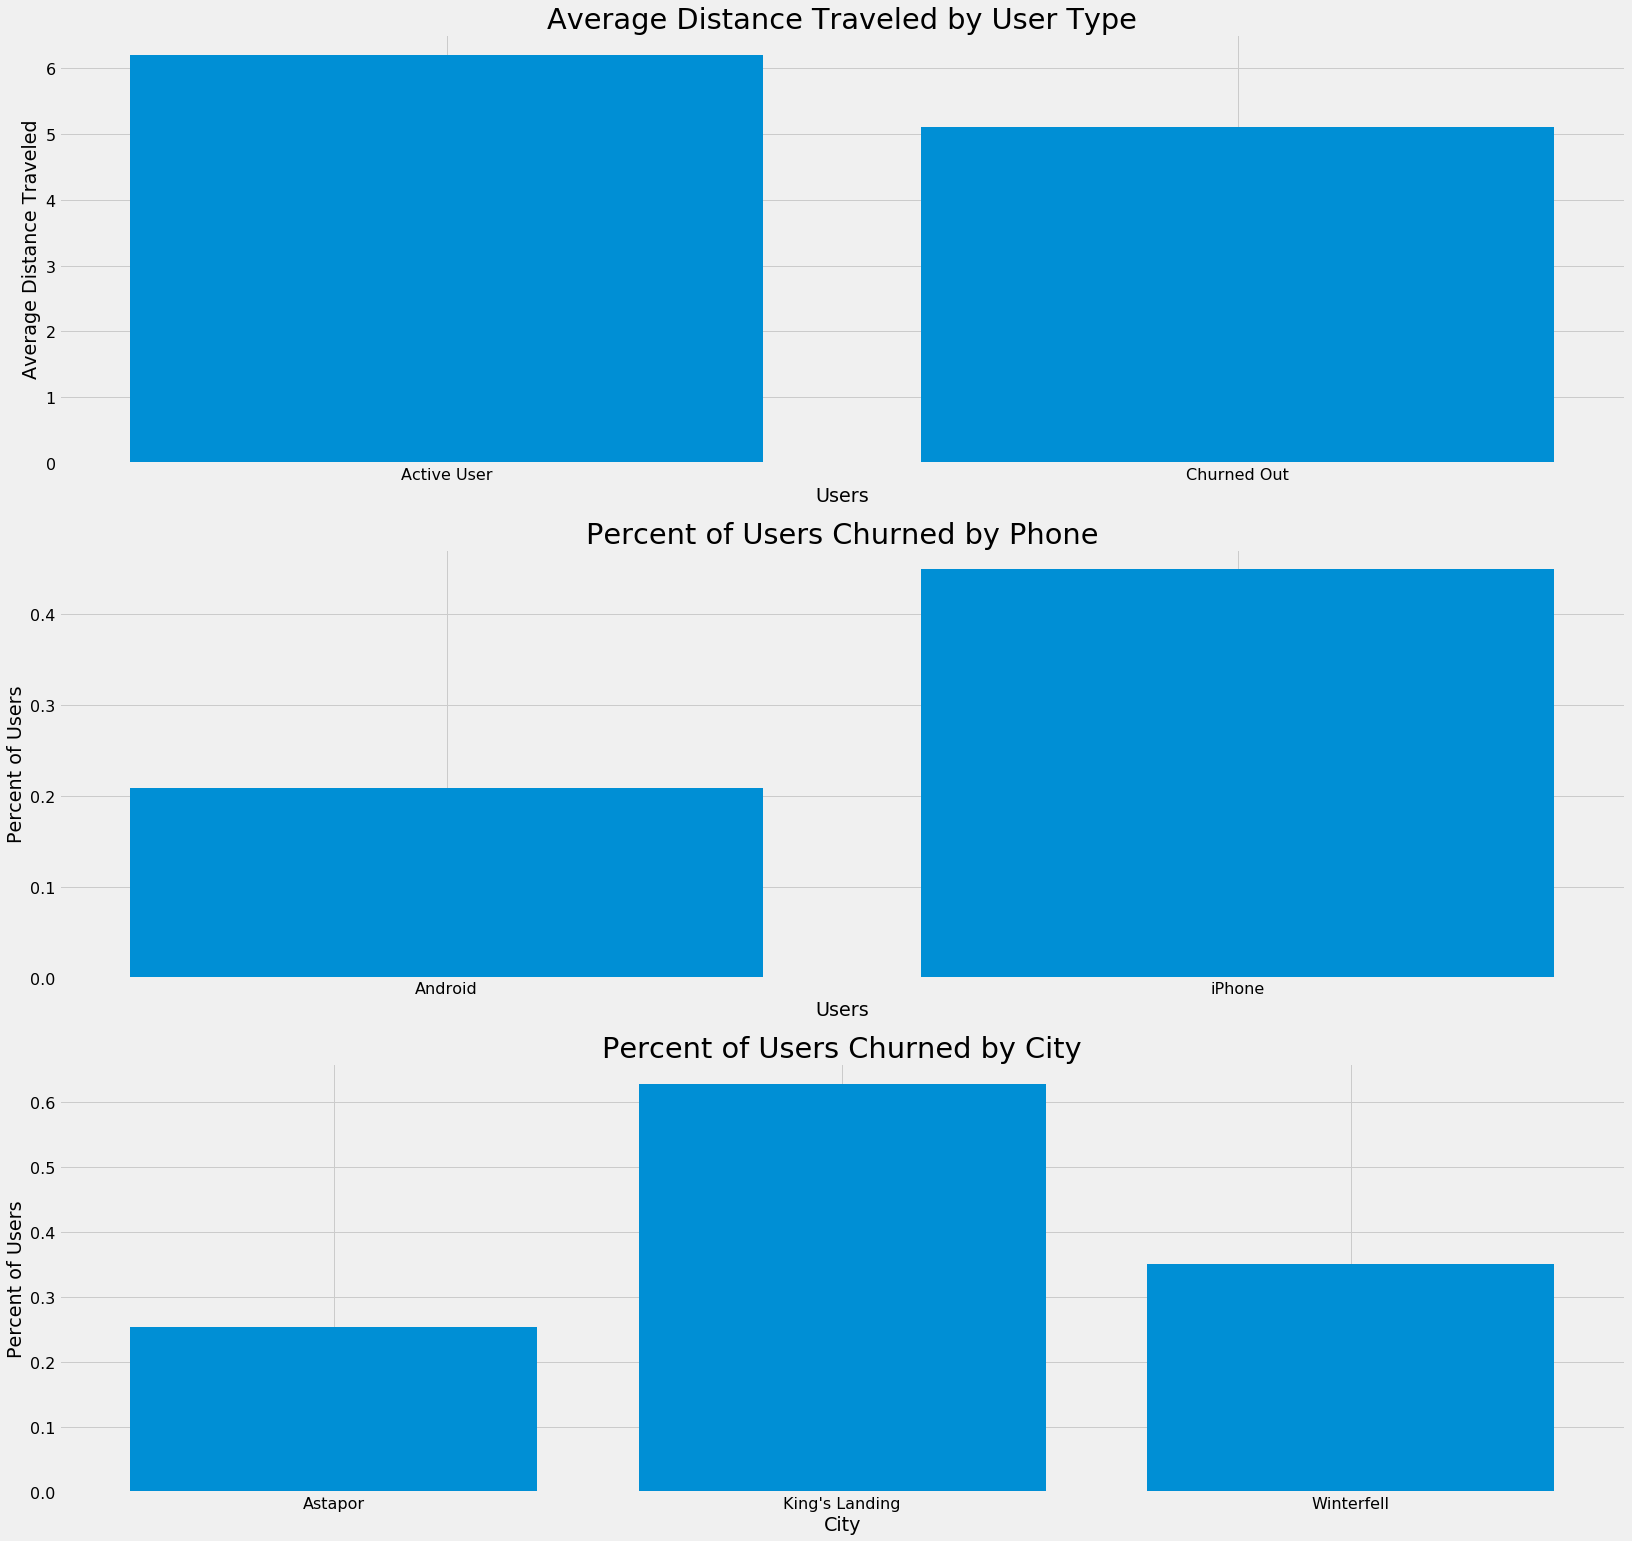

In [354]:
fig, ax = plt.subplots(3,1, figsize = (25,25))
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 20
ax[0].bar(key, value)
ax[0].ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax[0].set_xticklabels(x1labels)
ax[0].set_xticks(x1)
ax[0].set_xlabel('Users')
ax[0].set_ylabel('Average Distance Traveled')
ax[0].set_title('Average Distance Traveled by User Type')



ax[1].bar(key2, value2)
ax[1].ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax[1].set_xticklabels(x2labels)
ax[1].set_xticks(x2)
ax[1].set_xlabel('Users')
ax[1].set_ylabel('Percent of Users')
ax[1].set_title('Percent of Users Churned by Phone')


ax[2].bar(key3, value3)
ax[2].ticklabel_format(axis = 'y', useOffset=False, style='plain')
ax[2].set_xticklabels(x3labels)
ax[2].set_xticks(x3)
ax[2].set_xlabel('City')
ax[2].set_ylabel('Percent of Users')
ax[2].set_title('Percent of Users Churned by City')


In [355]:
churn_and_distance = fig.savefig(
    '/Users/jacobtryba/DSI/assignments/supervised-learning-case-study/imgs/churndistance.png', bbox_inches='tight')